In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.12.0


In [2]:
itxt="test.txt"
with open(itxt,"r") as f:
    datalist = f.readlines()
f.close()
datanp=np.zeros((502,8))
count=0
for i in datalist:
    datai=i.split("\n")[0].split("\t")
    for j in range(8):
        datanp[count:count+1,j]=float(datai[j])
    count=count+1
print(datanp[100:103,:],datanp.shape)

[[ 3.88636868  2.65086254  3.66091542  1.704522    1.04326622  2.99045269
  -0.25627382  3.59156201]
 [ 3.88876868  2.6540627   3.65831537  1.70612203  1.04426626  2.99365284
  -0.32400919  3.54008957]
 [ 3.89116868  2.65726306  3.65571527  1.7077221   1.04526635  2.99685317
  -0.39140276  3.48755653]] (502, 8)


In [3]:
itxt="test_1.txt"
with open(itxt,"r") as f:
    datalist = f.readlines()
f.close()
datanp1=np.zeros((514,8))
count=0
for i in datalist:
    datai=i.split("\n")[0].split("\t")
    for j in range(8):
        datanp1[count:count+1,j]=float(datai[j])
    count=count+1
print(datanp1[100:103,:],datanp1.shape)

[[4.85157    2.3378     3.91528    1.54799    0.945434   3.27120298
  7.76659156 7.32543768]
 [4.85157    2.3378     3.91528    1.54799    0.94543401 3.29360299
  7.91923856 7.40621885]
 [4.85157    2.3378     3.91528023 1.54798997 0.94543402 3.31600279
  8.06869655 7.48689935]] (514, 8)


In [4]:
dataX=np.vstack((datanp[:,0:6],datanp1[:,0:6]))
datay=np.vstack((datanp[:,7:8],datanp1[:,7:8]))
N=dataX.shape[0]
print(N)
train_index=np.random.choice(N,900,replace=False)
remain_index=np.setdiff1d(np.arange(0,N),train_index) 
XTrain=np.take(dataX,train_index,axis=0)
yTrain=np.take(datay,train_index,axis=0)
XTest=np.take(dataX,remain_index,axis=0)
yTest=np.take(datay,remain_index,axis=0)

1016


In [9]:
X=tf.constant(XTrain)
y=tf.constant(yTrain)
X_test=tf.constant(XTest)
y_test=tf.constant(yTest)


In [28]:
tf.random.set_seed(452)
# 1. Create a module using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(6,activation='relu',input_shape=[6]), 
  #tf.keras.layers.Dense(6,activation='relu'), 
  tf.keras.layers.Dense(8,activation='relu'), 
  tf.keras.layers.Dense(10,activation='relu'),            
  #tf.keras.layers.Dense(15,activation='relu'),                   
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss = tf.keras.losses.mse,
              optimizer =tf.keras.optimizers.Adam(),
              #optimizer =tf.keras.optimizers.SGD(),
              #optimizer =tf.keras.optimizers.RMSprop(0.001),
              metrics= ['mse'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
callbacks = [early_stopping]
#Fit the model
model.fit(tf.expand_dims(X, axis=-1), y,  validation_data=(X_test,y_test),epochs=300)
#model.fit(tf.expand_dims(X, axis=-1), y, validation_data=(X_test,y_test),callbacks=callbacks,epochs=300)
model.summary()

Epoch 1/300
29/29 [==============================] - 3s 32ms/step - loss: 171.7032 - mse: 171.7032 - val_loss: 181.5862 - val_mse: 181.5862
Epoch 2/300
29/29 [==============================] - 0s 15ms/step - loss: 168.7397 - mse: 168.7397 - val_loss: 178.6499 - val_mse: 178.6499
Epoch 3/300
29/29 [==============================] - 0s 15ms/step - loss: 165.4688 - mse: 165.4688 - val_loss: 175.3401 - val_mse: 175.3401
Epoch 4/300
29/29 [==============================] - 0s 16ms/step - loss: 161.7416 - mse: 161.7416 - val_loss: 172.2029 - val_mse: 172.2029
Epoch 5/300
29/29 [==============================] - 0s 14ms/step - loss: 158.8103 - mse: 158.8103 - val_loss: 170.0531 - val_mse: 170.0531
Epoch 6/300
29/29 [==============================] - 0s 15ms/step - loss: 156.9889 - mse: 156.9889 - val_loss: 168.7017 - val_mse: 168.7017
Epoch 7/300
29/29 [==============================] - 0s 14ms/step - loss: 155.8827 - mse: 155.8827 - val_loss: 168.0554 - val_mse: 168.0554
Epoch 8/300
29/29 [=

In [29]:
a1=np.sum(np.abs(model.predict(X_test)-y_test)/y_test)/len(y_test)
a2=np.sum(np.abs(model.predict(X)-y)/y)/len(y)
print(a2,a1)

29/29 [==============================] - 0s 3ms/step
-0.01400733525369028 0.08206470882255289


In [30]:
np.sum(np.abs(model.predict(X)-y)/y)/len(y)

29/29 [==============================] - 0s 3ms/step


-0.01400733525369028

In [50]:
np.abs(model.predict(X)-y)/y

29/29 [==============================] - 0s 7ms/step


<tf.Tensor: shape=(900, 1), dtype=float64, numpy=
array([[ 3.64687049e-02],
       [ 1.39407098e-01],
       [-1.58471400e-02],
       [ 1.07517352e-01],
       [-3.89119348e-02],
       [ 1.05249686e-01],
       [-8.60996671e-02],
       [ 3.50800083e-02],
       [ 1.71564016e-02],
       [ 1.67646363e-02],
       [-1.52384742e-02],
       [-3.14609674e-03],
       [ 2.93687657e-01],
       [-4.19696192e-02],
       [-1.28896281e-02],
       [ 4.81367918e-01],
       [ 1.03898619e-01],
       [ 4.06342644e-02],
       [ 8.57885398e-02],
       [ 1.39603307e-01],
       [ 3.70799757e-01],
       [-2.58544562e-03],
       [-1.70013554e-02],
       [-1.66008629e-02],
       [ 1.37336333e-01],
       [ 6.48400788e-02],
       [ 4.54307804e-02],
       [ 2.65994258e-01],
       [ 9.54623756e-02],
       [ 3.91849381e-02],
       [ 4.33116741e-02],
       [ 1.03022880e-01],
       [ 6.62521349e-02],
       [ 1.18807162e-01],
       [ 9.53401509e-02],
       [-5.23292878e-02],
       [ 1.159

In [15]:
model.predict(X_test)[10:20],y_test[10:20]

4/4 [==============================] - 0s 4ms/step


(array([[ 3.8696747],
        [ 3.4922147],
        [ 3.322679 ],
        [ 2.6056015],
        [ 2.3571618],
        [ 2.295041 ],
        [ 2.2329378],
        [ 1.1171249],
        [-0.7853906],
        [-4.590511 ]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=float64, numpy=
 array([[ 3.96509648],
        [ 3.43397071],
        [ 3.15034036],
        [ 1.59821079],
        [ 1.26475886],
        [ 1.17903248],
        [ 1.09237064],
        [ 0.17573849],
        [-1.35875671],
        [-4.89720941]])>)

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 42        
                                                                 
 dense_21 (Dense)            (None, 8)                 56        
                                                                 
 dense_22 (Dense)            (None, 10)                90        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


4/4 [==============================] - 0s 3ms/step


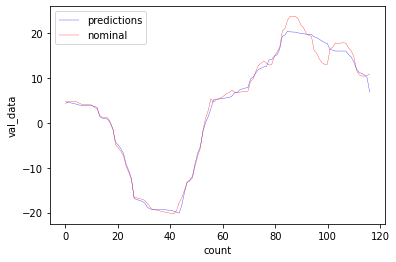

In [53]:
t=np.linspace(0, len(y_test), num=len(y_test))
plt.figure()
plt.plot(t,model.predict(X_test), color='blue', marker=' ', linestyle='solid',linewidth=0.3, markersize=5,label="predictions")
plt.plot(t,y_test, color='red', marker=' ', linestyle='solid',linewidth=0.3, markersize=5, label="nominal")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("val_data")
pngf="Bijia1.png"
plt.savefig(pngf, dpi=500)